## This is a python code to convert a image into a 2D matrix
The code import all the image files from both the strain folder and the geometry folder
- convert the shape of graphene
- convert the PMF 

In [8]:
import numpy as np
import pandas as pd
from IPython.display import Image
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
from PIL import Image
from numpy import*
import math

In [37]:
#a = Image(filename= "Geometry/fr0001.jpg", width = 200, height = 200)
Gentries = os.listdir("Geometry/")
if '.DS_Store' in Gentries:
    Gentries.remove('.DS_Store')
Gentries.sort()
sorted(Gentries)
numFilesG = len(Gentries)   # get the total number of images
print("the number of geometry figures:", numFilesG)
img = mpimg.imread('Geometry/'+Gentries[0])
A = np.array(img)             # Creates an array, white pixels==True and black pixels==False
print("the size of each geometry figure is:", A.shape)    
 # create a matrix to store all the 2D data

    
    
Bentries = os.listdir("Bfield/")
if '.DS_Store' in Bentries:
    Bentries.remove('.DS_Store')
Bentries.sort()
sorted(Bentries)
numFilesB = len(Bentries)   # get the total number of images
print("the number of Strain figures:", numFilesB)
img = mpimg.imread('Bfield/'+Bentries[0])
A = np.array(img)             # Creates an array, white pixels==True and black pixels==False
print("the size of each Strain figure is:", A.shape)  

the number of geometry figures: 1000
the size of each geometry figure is: (480, 640, 3)
the number of Strain figures: 1000
the size of each Strain figure is: (480, 640, 3)


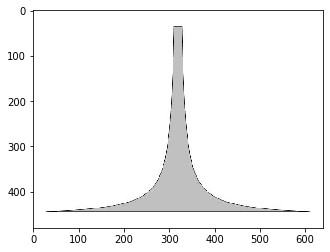

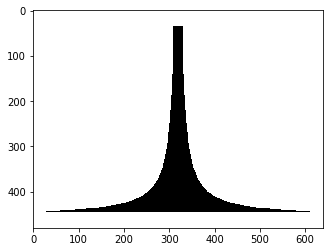

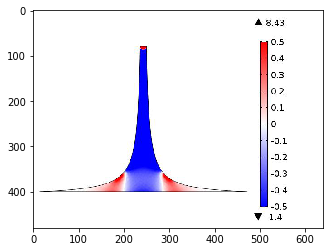

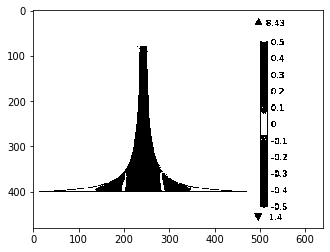

In [58]:
# set the threashold and get the PMS distribution. 
# get euclidean distance between the targeted colore and white which is [255 255 255]
# d=(x1−x2)2+(y1−y2)2+(z1−z2)2
def distance(color):
    return math.sqrt((255 - color[0])**2 + (255 - color[1])**2 + (255 - color[2])**2)

# convert the image pattern to 0s and 1s. and store in a 2D array. 
#threshold is to adjust the threshold of the distance between white color
#and the pattern color. 
def Img2Mat(path, filename, threshold):
    img = mpimg.imread(path + filename)
    A = np.array(img)             # Creates an array, white pixels==True and black pixels==False
    white = np.array([255, 255, 255])
    new_A= np.zeros((A.shape[0],A.shape[1]))    #New array with same size as A
    for i in range(len(A)):
            for j in range(len(A[i])):
                if distance(A[i][j]) < threshold:
                    new_A[i][j]=1
                else:
                    new_A[i][j]=0
    return new_A    

def Img2MatPlot(path, filename, threshold):
    img = mpimg.imread(path + filename)
    plt.figure()
    plt.imshow(img)
    A = np.array(img)             # Creates an array, white pixels==True and black pixels==False
    white = np.array([255, 255, 255])
    new_A= np.zeros((A.shape[0],A.shape[1]))    #New array with same size as A
    for i in range(len(A)):
            for j in range(len(A[i])):
                if distance(A[i][j]) < threshold:
                    new_A[i][j]=1
                else:
                    new_A[i][j]=0
    plt.figure()    
    plt.imshow(new_A, cmap='gray', vmin=0, vmax=1)
    
Img2MatPlot("Geometry/", Gentries[0], 50)
Img2MatPlot("Bfield/", Bentries[0], 50)

# pattern = Img2Mat("Geometry/", Gentries[0], 50)
# PMF = Img2Mat("Bfield/", Bentries[0], 50)
# matNobackground = np.subtract(PMF, pattern)

# plt.figure()    
# plt.imshow(pattern, cmap='gray', vmin=0, vmax=1)

# plt.figure()    
# plt.imshow(PMF, cmap='gray', vmin=0, vmax=1)

# plt.figure()    
# plt.imshow(matNobackground, cmap='gray', vmin=0, vmax=1)


In [62]:
# pattern = Img2Mat("Geometry/", Gentries[0], 50)
# PMF = Img2Mat("Bfield/", Bentries[0], 50)
print(pattern.shape)
print(PMF.shape)
p = np.concatenate((pattern, PMF), axis = 1)
print(p.shape)

(480, 640)
(480, 640)
(480, 1280)


In [63]:
res= np.zeros((A.shape[0]*numFilesG,A.shape[1]*2)) 
pattern = Img2Mat("Geometry/", Gentries[0], 50)
PMF = Img2Mat("Bfield/", Bentries[0], 50)
imgWidth = pattern.shape[0]
imgLength = pattern.shape[1]
for i in range(1, 1):
    pattern = Img2Mat("Geometry/", Gentries[i], 50)
    PMF = Img2Mat("Bfield/", Bentries[i], 50)
    res[(i*numFiles):(i*numFiles+imgWidth), 0:end] = np.concatenate((pattern, PMF), axis = 1)
print(res.shape) 


(480000, 1280)


In [61]:
res= np.zeros((3,3))
print(res)
temp = np.array([[1,2],[3,4],[5,6]])
print(temp)
res[0:3, 0:2] = temp
print(res)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1 2]
 [3 4]
 [5 6]]
[[1. 2. 0.]
 [3. 4. 0.]
 [5. 6. 0.]]
